In [1]:
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

# Importing modules
import pandas as pd
import os
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora# Create Dictionary

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading Data

In [2]:
def read_text_files_in_folder(folder_path):
    data = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".txt"):
                full_path = os.path.join(root, file)
                with open(full_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                data.append({
                    'file_name': file,
                    'file_path': full_path,
                    'content': content
                })
                
    return pd.DataFrame(data)

os. chdir("c:\\Users\\simon\\OneDrive\\Dokumente\\UNILU\\3 - HS24\\1 MA\\business-reports-nlp")
folder_path = "reports_digipay_txt/consultancies_pdfminer_cleaned"#"examples"
df = read_text_files_in_folder(folder_path)
df.head()

,file_name,file_path,content
0,Accenture-Consumer-Mobile-Payments-Survey.2013...,reports_digipay_txt/consultancies_pdfminer_cle...,Consumer Mobile Payments Survey\n\nDriving Val...
1,accenture.PSD2-Seizing-Opportunities-EU-Paymen...,reports_digipay_txt/consultancies_pdfminer_cle...,Accenture Payment Services\n\nSeizing the Oppo...
2,bain_brief_embedded-finance.txt,reports_digipay_txt/consultancies_pdfminer_cle...,Embedded Finance: What It Takes to Prosper in...
3,BCG-Global-Payments-2019-Tapping-into-Pockets-...,reports_digipay_txt/consultancies_pdfminer_cle...,Global Payments 2019\n\nTAPPING INTO POCKETS ...
4,BCG.Digital Payments 2020. 2016.txt,reports_digipay_txt/consultancies_pdfminer_cle...,Digital Payments 2020\nTHE MAKING OF A $500 BI...


Data Cleaning

In [4]:
# Remove the columns
texts = df.drop(columns=['file_name', 'file_path'], axis=1)# Print out the first rows of papers
texts.head()

# Remove Punctuation / Lower Casing
# Remove punctuation
texts['paper_text_processed'] = \
texts['content'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
texts['paper_text_processed'] = \
texts['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
texts['paper_text_processed'].head()

0    consumer mobile payments survey\n\ndriving val...
1    accenture payment services\n\nseizing the oppo...
2    embedded finance: what it takes  to prosper in...
3    global payments 2019\n\ntapping into pockets  ...
4    digital payments 2020\nthe making of a $500 bi...
Name: paper_text_processed, dtype: object

Exploratory Data Analysis

124


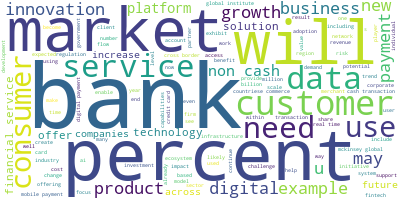

In [5]:
print(len(texts))
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(texts['paper_text_processed'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

Prepare data for LDA Analysis

In [6]:
stop_words = set(stopwords.words('english'))

# Function to tokenize text and remove stopwords
def tokenize_and_filter(text):
    words = text.lower().split()
    return [word for word in words if word not in stop_words]

# Tokenize and filter stopwords
texts['tokenized_text'] = texts['paper_text_processed'].apply(tokenize_and_filter)

# Create corpus and dictionary
dictionary = corpora.Dictionary(texts['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in texts['tokenized_text']]

# The 'dictionary' now contains the mapping between words and their integer ids
# The 'corpus' is a list of bag-of-words representations of each document

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


LDA Model Training

In [7]:
from gensim.models.ldamodel import LdaModel

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print topics and the words associated
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(f'Topic {topic[0]}: Words: {topic[1]}')

Topic 0: Words: 0.004*"software" + 0.002*"merchant" + 0.002*"pos" + 0.002*"vars"
Topic 1: Words: 0.023*"payments" + 0.018*"mobile" + 0.008*"payment" + 0.006*"digital"
Topic 2: Words: 0.013*"global" + 0.012*"flows" + 0.007*"percent" + 0.007*"mckinsey"
Topic 3: Words: 0.010*"fs" + 0.010*"fintech" + 0.009*"tmt" + 0.007*"digital"
Topic 4: Words: 0.012*"banks" + 0.008*"banking" + 0.008*"digital" + 0.006*"payments"
Topic 5: Words: 0.020*"mobile" + 0.015*"payment" + 0.013*"digital" + 0.010*"financial"
Topic 6: Words: 0.025*"payments" + 0.009*"banks" + 0.009*"payment" + 0.006*"services"
Topic 7: Words: 0.009*"skills" + 0.008*"mckinsey" + 0.007*"global" + 0.007*"ai"
Topic 8: Words: 0.000*"payments" + 0.000*"digital" + 0.000*"global" + 0.000*"banks"
Topic 9: Words: 0.030*"payments" + 0.011*"percent" + 0.010*"growth" + 0.007*"revenue"


Analyzing LDA model results

In [8]:
from gensim.models.coherencemodel import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts['tokenized_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.4186936131698961


In [9]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualization
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Show the plot
pyLDAvis.display(vis)

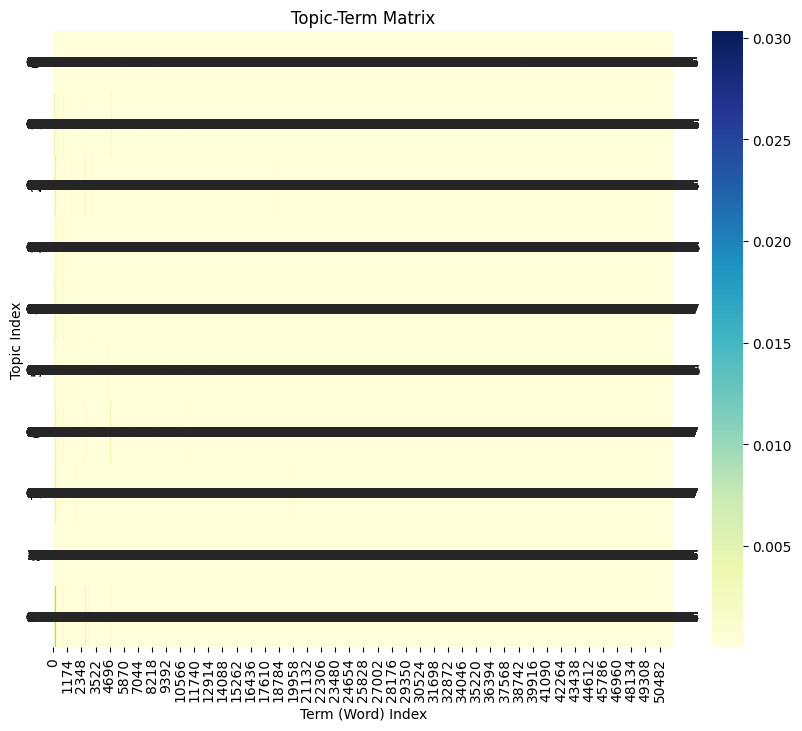

In [13]:
# Heatmap of Topic-Word Distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Get topic-term matrix
topic_term_matrix = lda_model.get_topics()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(topic_term_matrix, cmap="YlGnBu", annot=True)
plt.title("Topic-Term Matrix")
plt.xlabel("Term (Word) Index")
plt.ylabel("Topic Index")
plt.show()



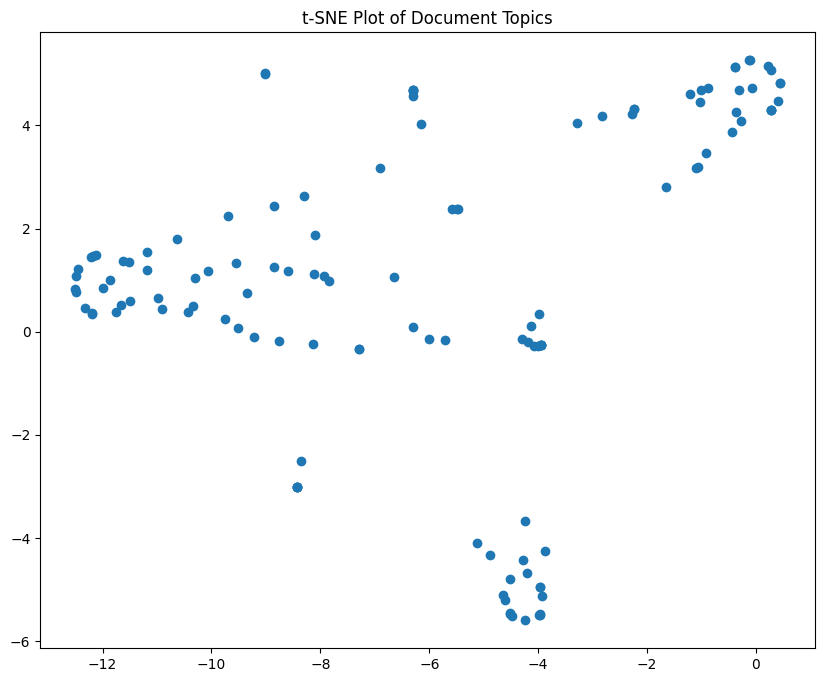

In [14]:
# t-SNE (t-Distributed Stochastic Neighbor Embedding) Plot
from sklearn.manifold import TSNE
import numpy as np

# Prepare topic weights matrix
doc_topics = [lda_model[doc] for doc in corpus]
doc_topic_weights = np.zeros((len(corpus), lda_model.num_topics))

for i, topic_weights in enumerate(doc_topics):
    for topic, weight in topic_weights:
        doc_topic_weights[i, topic] = weight

# Apply t-SNE transformation
tsne = TSNE(n_components=2, random_state=0)
tsne_fit = tsne.fit_transform(doc_topic_weights)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_fit[:, 0], tsne_fit[:, 1])
plt.title("t-SNE Plot of Document Topics")
plt.show()
